In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float', '{:.4f}'.format)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'D:\kaggle_data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.shape

(7043, 21)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0000,7043.0000,7043.0000
mean,0.1621,32.3711,64.7617
std,0.3686,24.5595,30.0900
min,0.0000,0.0000,18.2500
25%,0.0000,9.0000,35.5000
50%,0.0000,29.0000,70.3500
75%,0.0000,55.0000,89.8500
max,1.0000,72.0000,118.7500


# 1.EDA

In [8]:
"""
数据共有21列
'Churn' 为标记列 (Yes,No)
先来看一下Churn的分布情况
"""

"\n数据共有21列\n'Churn' 为标记列 (Yes,No)\n先来看一下Churn的分布情况\n"

In [9]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

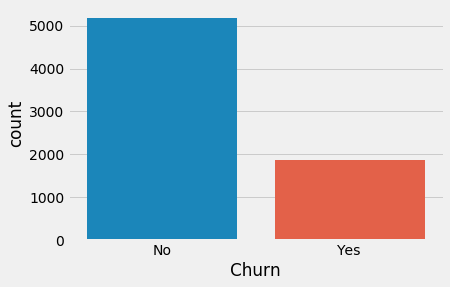

In [10]:
sns.countplot('Churn',data = data)

### 下面对其他特征和Churn的关系进行可视化展示

In [ ]:
"""
'gender' 消费者性别 （male，female）
'SeniorCitizen' 是否为老年用户（1,0）
'Partner' 消费者有无伙伴 （yes,no）
'Dependents'消费者有无抚养人（yes,no）
'PhoneService' 消费者有无电话服务（yes,no）
'PaperlessBilling' 消费者是否无纸化服务（yes,no）
"""

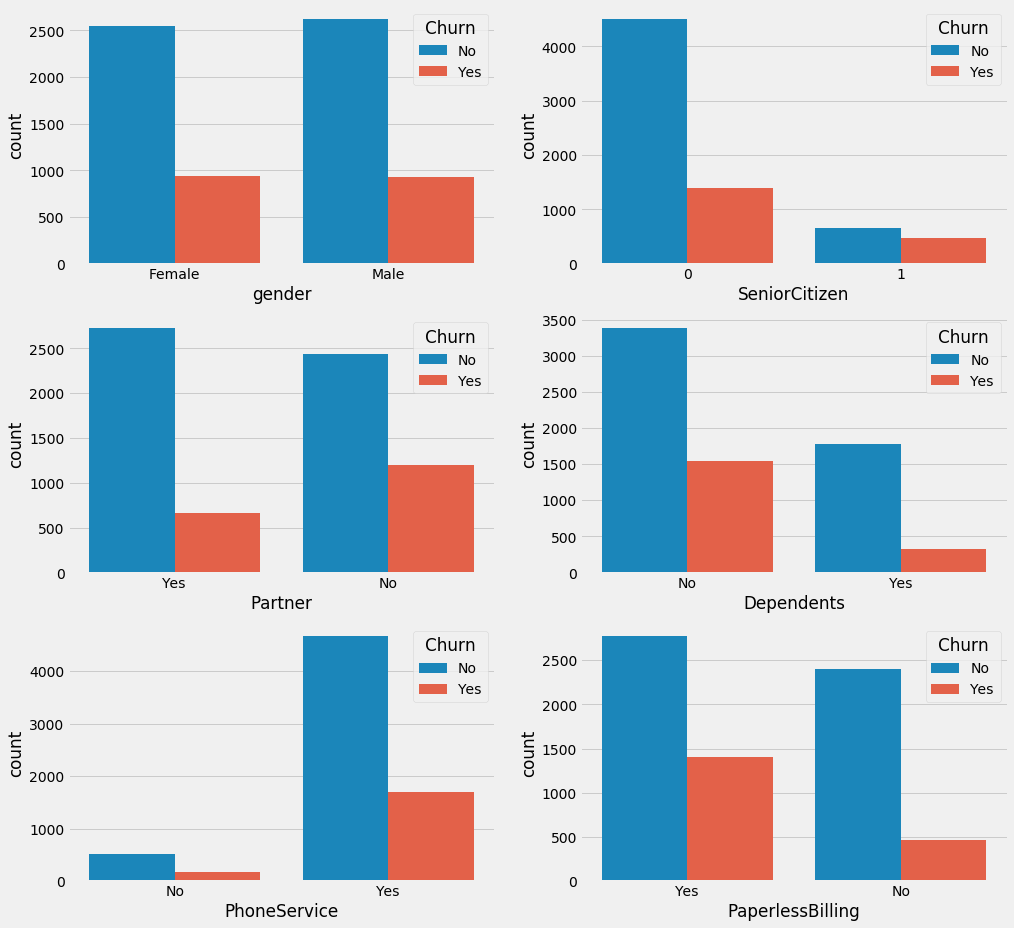

In [11]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('gender', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('SeniorCitizen', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('Partner', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('Dependents', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('PhoneService', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('PaperlessBilling', data=data, hue='Churn')

In [ ]:
"""
可以看出性别特征对于用户流失与否的影响并不大，上了年纪的人用户流失率会偏高一些
单身狗的流失率会略高于有对象的
"""

In [ ]:
"""
tenure:消费者已经在公司注册的月份
MonthlyCharges：每月向消费者收取的金额
TotalCharges：向客户收取的总金额
"""

In [12]:
data['tenure'].value_counts() # 查看消费者使用的总月份信息
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

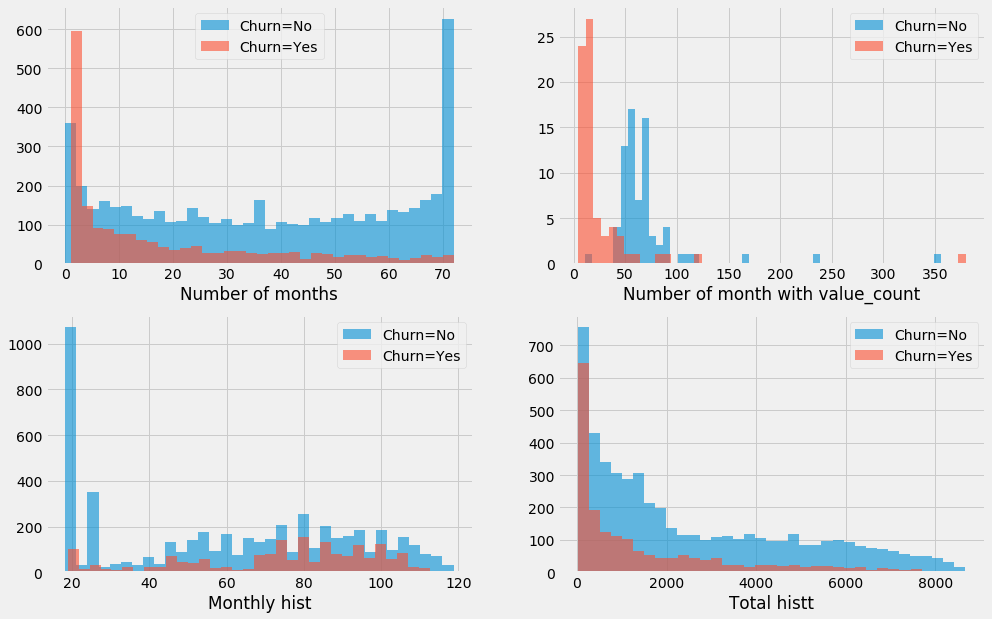

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
data[data.Churn == 'No'].tenure.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of months')

plt.subplot(3, 2, 2)
data[data.Churn == 'No'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=Yes')
plt.xlabel("Number of month with value_count")
plt.legend()

plt.subplot(3, 2, 3)
data[data.Churn == 'No'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Monthly hist')
plt.legend()

plt.subplot(3, 2, 4)
data[data.Churn == 'No'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Total histt')
plt.legend()

In [ ]:
"""
    OnlineSecurity: 消费者是否具有在线安全(Yes, No, No internet service)
    OnlineBackup: 消费者是否具有在线备份(Yes, No, No internet service)
    InternetService: 消费者的网络供应商 (DSL, Fiber optic, No)
    MultipleLines: 消费者有无多条线路选择(Yes, No, No phone service)
    DeviceProtection: 消费者是否具有设备功能 (Yes, No, No internet service)
    TechSupport: 消费者是否获得设备支撑(Yes, No, No internet service)
"""

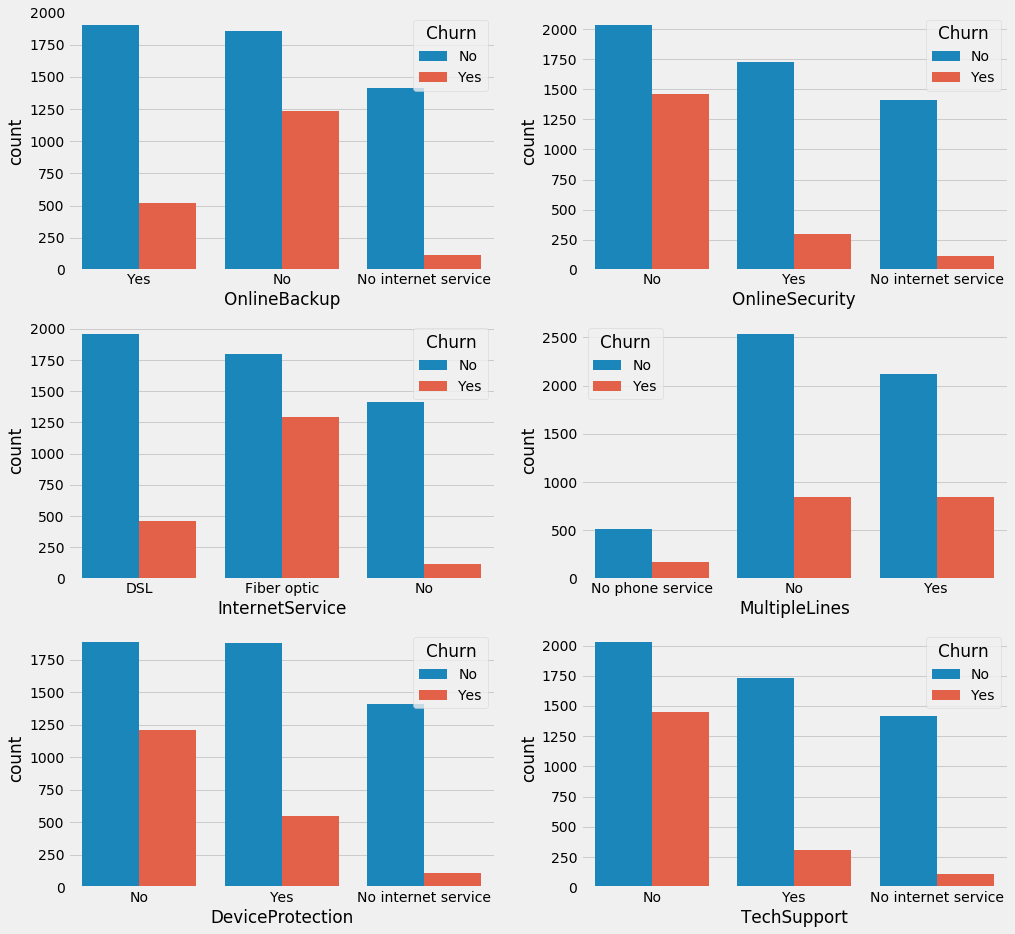

In [15]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('OnlineBackup', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('OnlineSecurity', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('InternetService', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('MultipleLines', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('DeviceProtection', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('TechSupport', data=data, hue='Churn')

In [ ]:
"""
StreamingMovies:消费者是否具有流媒体影院(Yes,No,No internet)
StreamingTV:消费者是否具有流媒体电视(Yes,No,No internet)
PaymentMethod：消费者的户款方式(Electronic check, Mailed check, Bank Transfer (automatic), Credit card (automatic))
Contract:消费者合同签了多久(Month-to-month, One year, Two year)
"""

[Text(0,0,'Month-to-month'), Text(0,0,'One year'), Text(0,0,'Two year')]

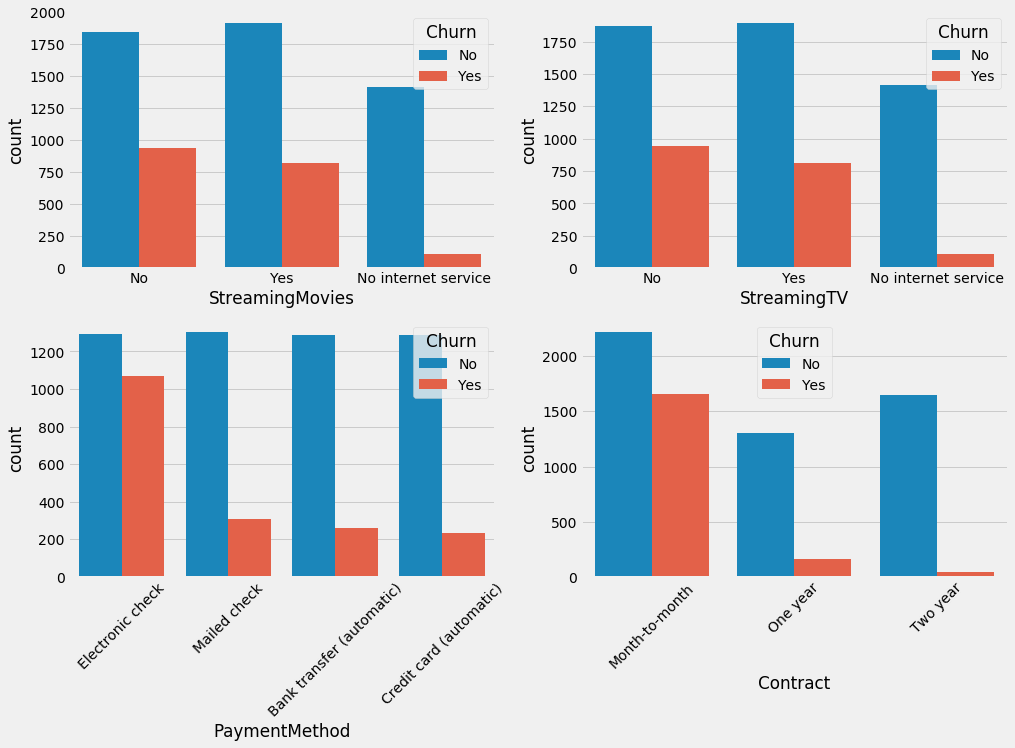

In [16]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('StreamingMovies', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('StreamingTV', data=data, hue='Churn')

plt.subplot(3, 2, 3)
g = sns.countplot('PaymentMethod', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

plt.subplot(3, 2, 4)
g = sns.countplot('Contract', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45)

# 2.特征工程 Feature Engineering

In [17]:
# 查看并处理缺失数据
data.isnull().sum()
# TotalCharges 的缺失数据才有中位数填充
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns:
    data[column] = data[column].replace({'No internet service':'No'})

In [18]:
# 将只有两个属性的列转化为0,1的格式 ， 首先找到只包括两个属性的所有列
columns_two = [column for column in data.columns if data[column].nunique() == 2]

In [19]:
columns_two

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [20]:
# 检查一下属性信息，集中转换
for col in columns_two:
    print(col,"====",data[col].unique())

gender ==== ['Female' 'Male']
SeniorCitizen ==== [0 1]
Partner ==== ['Yes' 'No']
Dependents ==== ['No' 'Yes']
PhoneService ==== ['No' 'Yes']
OnlineSecurity ==== ['No' 'Yes']
OnlineBackup ==== ['Yes' 'No']
DeviceProtection ==== ['No' 'Yes']
TechSupport ==== ['No' 'Yes']
StreamingTV ==== ['No' 'Yes']
StreamingMovies ==== ['No' 'Yes']
PaperlessBilling ==== ['Yes' 'No']
Churn ==== ['No' 'Yes']


In [21]:
columns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',  
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'Churn']
for col in columns:
    data[col] = data[col].map({'Yes':1, 'No':0})
    
data['gender'] = data.gender.map({'Male':1, 'Female':0})

In [22]:
for col in columns_two:
    print(col,"-----",data[col].unique())

gender ----- [0 1]
SeniorCitizen ----- [0 1]
Partner ----- [1 0]
Dependents ----- [0 1]
PhoneService ----- [0 1]
OnlineSecurity ----- [0 1]
OnlineBackup ----- [1 0]
DeviceProtection ----- [0 1]
TechSupport ----- [0 1]
StreamingTV ----- [0 1]
StreamingMovies ----- [0 1]
PaperlessBilling ----- [1 0]
Churn ----- [0 1]


In [23]:
def tenure_tran(period):
    """
    @param: period 
    @fun: 将'tennre'分成6组
    """
    if period <= 12 :
        return 1
    elif (period > 12) & (period <= 24 ):
        return 2
    elif (period > 24) & (period <= 36) :
        return 3
    elif (period > 36) & (period <= 48) :
        return 4
    elif (period > 48) & (period <= 60) :
        return 5
    elif period > 60 :
        return 6
    
data['tenure'] = data['tenure'].apply(tenure_tran)

In [24]:
# 将列特征数量较多的 使用get_dummy转换
dummy_col = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure']
data_deal = pd.get_dummies(data, columns=dummy_col, drop_first=True).drop("customerID",axis=1)

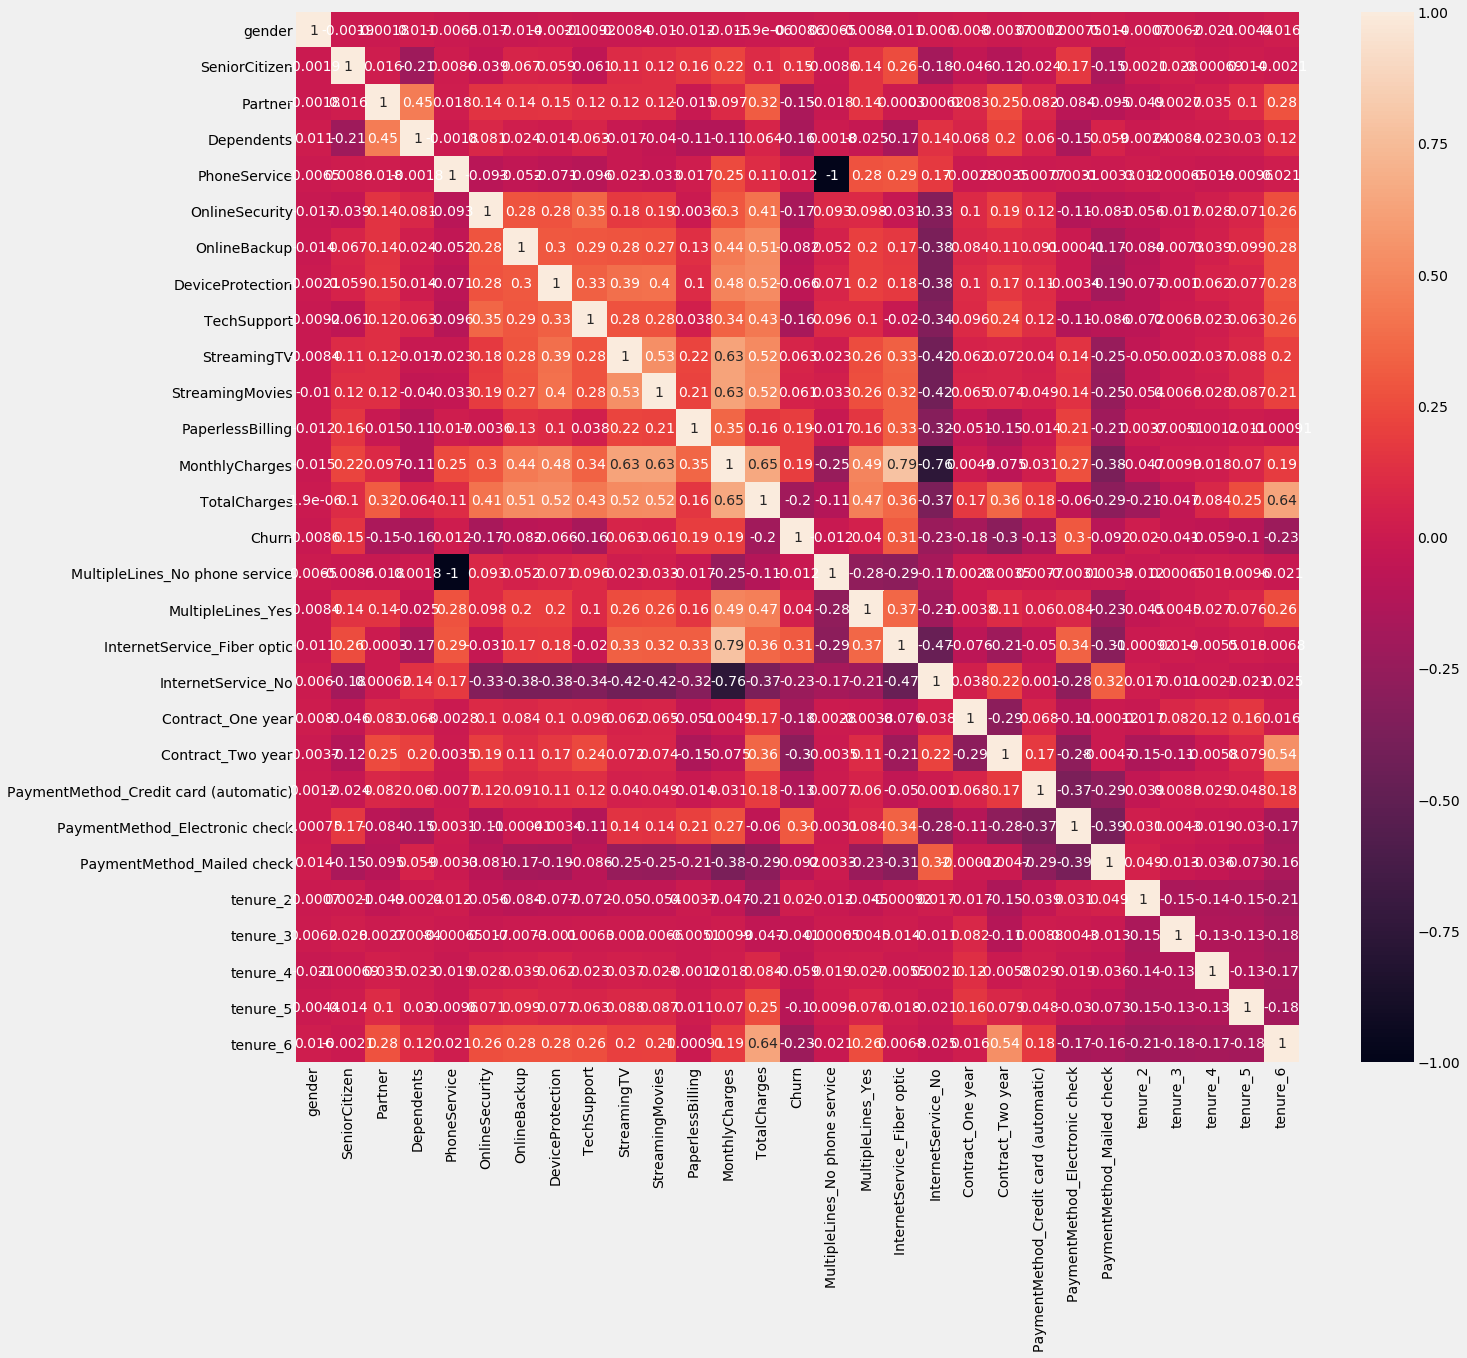

In [25]:
# 绘制热力图查看特征之间的关系
plt.figure(figsize=(20,18))
sns.heatmap(data_deal.corr(),annot = True)

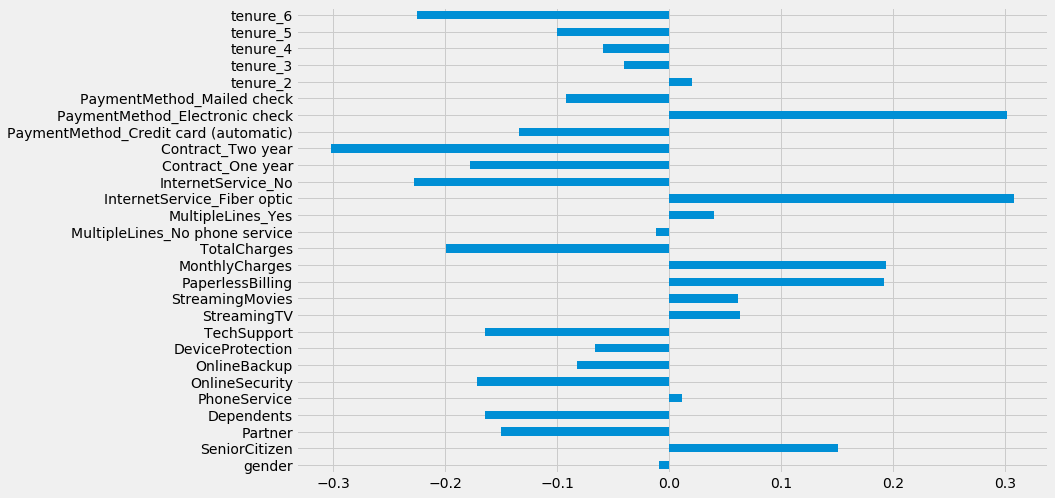

In [26]:
data_deal.drop('Churn', axis=1).corrwith(data.Churn).plot(kind='barh', figsize=(12, 8))

In [27]:
# 数据去重
print("before,",data_deal.shape)
data_deal.drop_duplicates(inplace=True)
print("after,",data_deal.shape)

before, (7043, 29)
after, (7021, 29)


# 3.Data Preprocessing

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
X = data_deal.drop("Churn",axis = 1)
y = data_deal['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [30]:
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

# 4.Model Building

In [31]:
print("base score =",(y_test.value_counts()[0] / len(y_test)))

base score = 0.7256763170384433


In [ ]:
"""
首先查看数据两个标签之间的数量关系，发现两个标签之间是不平衡的。也就是说即使我不做任何建模预测，全部将结果预测为真的话，也会有
%72.5的准确率
"""

In [32]:
# 分别从模型的准确率，精确率，召回率，f1-score四个维度来检验模型好坏
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

def print_score(clf,X_train,y_train,X_test,y_test,train = True):
    """
    @param clf: mechine learning fun
           train: 训练/测试
    @return : 展示不同训练集准确率/精准率/召回率/f1-score的得分以及混淆矩阵
    """
    if train:
        pred = clf.predict(X_train)
        print("This is train result:")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("This is test Result:")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


### 1.Use LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(penalty = 'l1')
lr_classifier.fit(X_train_std,y_train)

print_score(lr_classifier,X_train_std,y_train,X_test_std,y_test,train=True)
print_score(lr_classifier,X_train_std,y_train,X_test_std,y_test,train=False)

This is train result:
Accuracy Score: 80.61%
_______________________________________________
Classification Report:	Precision Score: 66.84%
			Recall Score: 50.59%
			F1 score: 57.59%
_______________________________________________
Confusion Matrix: 
 [[3314  321]
 [ 632  647]]

This is test Result:
Accuracy Score: 79.78%
_______________________________________________
Classification Report:	Precision Score: 68.45%
			Recall Score: 48.79%
			F1 score: 56.97%
_______________________________________________
Confusion Matrix: 
 [[1399  130]
 [ 296  282]]



In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier,X_std,y,cv = 3,scoring = 'f1')
print(scores)
print(f"Logistic Regression f1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.56617647 0.57116788 0.57904412]
Logistic Regression f1_score: 57.21% +/- (0.53)


### 2.Use RandomForest

In [35]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

print_score(random_forest, X_train, y_train, X_test, y_test, train=True)
print_score(random_forest, X_train, y_train, X_test, y_test, train=False)

D:\A\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


This is train result:
Accuracy Score: 99.84%
_______________________________________________
Classification Report:	Precision Score: 99.46%
			Recall Score: 99.92%
			F1 score: 99.69%
_______________________________________________
Confusion Matrix: 
 [[3628    7]
 [   1 1278]]

This is test Result:
Accuracy Score: 78.83%
_______________________________________________
Classification Report:	Precision Score: 66.02%
			Recall Score: 47.06%
			F1 score: 54.95%
_______________________________________________
Confusion Matrix: 
 [[1389  140]
 [ 306  272]]



In [ ]:
"""
会发现使用随机森林产生了过拟合的现象，下面我使用GridSearchCV交叉验证来让他自动调参
"""

In [42]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100)

param_grid = {'n_estimators':[550, 600, 650],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)

In [43]:
rf_grid_cv.fit(X_train`, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 20.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [550, 600, 650], 'max_depth': [3, 5, 7, 10, 15, None], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 5, 7, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [45]:
rf_grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=550, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rf_clf = RandomForestClassifier(criterion='gini',
                                max_depth=15,
                                min_samples_leaf=1, 
                                min_samples_split=10,
                                n_estimators=550)

rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

This is train result:
Accuracy Score: 89.46%
_______________________________________________
Classification Report:	Precision Score: 86.34%
			Recall Score: 70.68%
			F1 score: 77.73%
_______________________________________________
Confusion Matrix: 
 [[3492  143]
 [ 375  904]]

This is test Result:
Accuracy Score: 80.49%
_______________________________________________
Classification Report:	Precision Score: 70.12%
			Recall Score: 50.35%
			F1 score: 58.61%
_______________________________________________
Confusion Matrix: 
 [[1405  124]
 [ 287  291]]



In [ ]:
"""
可以看到和之前相比，有了显著的变化，解决了过拟合的问题
"""

In [47]:

scores = cross_val_score(rf_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")



[0.55893536 0.57300275 0.56744186]
Random Forest F1_score: 56.65% +/- (0.58)


### 3.Use SVM

In [48]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

This is train result:
Accuracy Score: 80.57%
_______________________________________________
Classification Report:	Precision Score: 69.06%
			Recall Score: 45.90%
			F1 score: 55.14%
_______________________________________________
Confusion Matrix: 
 [[3372  263]
 [ 692  587]]

This is test Result:
Accuracy Score: 79.21%
_______________________________________________
Classification Report:	Precision Score: 69.44%
			Recall Score: 43.25%
			F1 score: 53.30%
_______________________________________________
Confusion Matrix: 
 [[1419  110]
 [ 328  250]]



In [49]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['rbf']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
grid_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   56.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [50]:
grid_cv.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
svc = SVC(C=10, gamma=0.001, kernel='rbf')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

This is train result:
Accuracy Score: 80.59%
_______________________________________________
Classification Report:	Precision Score: 67.96%
			Recall Score: 48.08%
			F1 score: 56.32%
_______________________________________________
Confusion Matrix: 
 [[3345  290]
 [ 664  615]]

This is test Result:
Accuracy Score: 79.59%
_______________________________________________
Classification Report:	Precision Score: 68.69%
			Recall Score: 47.06%
			F1 score: 55.85%
_______________________________________________
Confusion Matrix: 
 [[1405  124]
 [ 306  272]]



In [60]:
scores = cross_val_score(svc, X_std, y, cv=3, scoring='f1')
print(scores)
print(f"Support Vector Machine f1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")


[0.55218216 0.54976303 0.56156716]
Support Vector Machine f1_score: 55.45% +/- (0.51)


### 4.Xgboost

In [54]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

This is train result:
Accuracy Score: 82.17%
_______________________________________________
Classification Report:	Precision Score: 70.01%
			Recall Score: 55.12%
			F1 score: 61.68%
_______________________________________________
Confusion Matrix: 
 [[3333  302]
 [ 574  705]]

This is test Result:
Accuracy Score: 80.45%
_______________________________________________
Classification Report:	Precision Score: 69.39%
			Recall Score: 51.38%
			F1 score: 59.05%
_______________________________________________
Confusion Matrix: 
 [[1398  131]
 [ 281  297]]



D:\A\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\A\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
hyperparameter_grid = {'n_estimators': [75, 90, 100, 125], 
                       'learning_rate' : [0.09, 0.1, 0.2], 
                       'base_score' : [0.15],
                       'colsample_bytree':[0.85, 0.95, 1],
                       'colsample_bylevel':[0.85, 0.95, 1],
                       'colsample_bynode':[0.85, 0.95, 1],
                      }

xgb_clf = XGBClassifier()
xgb_cv = GridSearchCV(estimator=xgb_clf, param_grid=hyperparameter_grid, cv=3, 
                      scoring='f1', n_jobs =-1, verbose=1)

xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [75, 90, 100, 125], 'learning_rate': [0.09, 0.1, 0.2], 'base_score': [0.15], 'colsample_bytree': [0.85, 0.95, 1], 'colsample_bylevel': [0.85, 0.95, 1], 'colsample_bynode': [0.85, 0.95, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [56]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.15, booster='gbtree', colsample_bylevel=0.95,
       colsample_bynode=0.95, colsample_bytree=0.95, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [57]:
xgb_clf = XGBClassifier(base_score=0.15, 
                        learning_rate=0.1, 
                        colsample_bylevel=0.95,
                        colsample_bynode=0.95, 
                        colsample_bytree=0.95,
                        n_estimators=100)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

This is train result:
Accuracy Score: 82.44%
_______________________________________________
Classification Report:	Precision Score: 70.47%
			Recall Score: 55.98%
			F1 score: 62.40%
_______________________________________________
Confusion Matrix: 
 [[3335  300]
 [ 563  716]]

This is test Result:
Accuracy Score: 80.26%
_______________________________________________
Classification Report:	Precision Score: 68.93%
			Recall Score: 51.04%
			F1 score: 58.65%
_______________________________________________
Confusion Matrix: 
 [[1396  133]
 [ 283  295]]



D:\A\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\A\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [59]:
scores = cross_val_score(xgb_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

D:\A\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\A\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0.59409594 0.58958517 0.57952468]
XGBoost F1_score: 58.77% +/- (0.61)


D:\A\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
